# Feature Engineering - 부동산 기본 특성(심승우)
        
### 수치형 변수:        
     - `LotFrontage`: 부동산과 연결된 도로 길이 (피트)
     - `LotArea`: 대지 크기 (평방 피트)
           
### 범주형 변수:      
    - `MSSubClass`: 건물 유형        
    - `MSZoning`: 일반적인 구역 분류        
    - `Street`: 도로 접근 유형        
    - `LotShape`: 대지의 일반적인 형태        
    - `LandContour`: 대지의 평탄도        
    - `Utilities`: 사용 가능한 유틸리티 종류        
    - `LotConfig`: 대지 구성        
    - `LandSlope`: 대지의 경사도        
    - `Neighborhood`: Ames 시 경계 내 물리적 위치        
    - `Condition1`: 주요 도로 또는 철도와의 인접성        
    - `Condition2`: 주요 도로 또는 철도와의 인접성 (두 번째가 있을 경우)

In [2]:
# 필요한 라이브러리 임포트

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import norm 
import sklearn
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
import requests
from matplotlib import font_manager
import matplotlib.dates as mdates
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

# 나눔고딕 폰트 다운로드
url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
response = requests.get(url)

# 다운로드한 폰트를 파일로 저장
with open("NanumGothic.ttf", "wb") as f:
    f.write(response.content)

# 폰트 설치
font_manager.fontManager.addfont('NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

# 마이너스 기호 표기 가능하게 수정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 훈련데이터 불러온 뒤 결측치 50% 이상인 컬럼 삭제
train_data = pd.read_csv('train.csv')
train_data = train_data.drop(columns=['MasVnrType', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'])
pd.set_option('display.max_columns', None)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_rows', None)
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [5]:
pd.set_option('display.max_rows', 20)

In [6]:
# 부동산 기본 특성 컬럼만 따로 모아보기
basic_cols = ['LotFrontage', 
              'LotArea', 
              'MSSubClass', 
              'MSZoning', 
              'Street', 
              'LotShape', 
              'LandContour', 
              'Utilities', 
              'LotConfig', 
              'LandSlope',
              'Neighborhood',
              'Condition1',
              'Condition2',
              'SalePrice']

In [7]:
train_data_basic = train_data[basic_cols]
train_data_basic.head()

,LotFrontage,LotArea,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
0,65.0,8450,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,208500
1,80.0,9600,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,181500
2,68.0,11250,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,223500
3,60.0,9550,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,140000
4,84.0,14260,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,250000


In [8]:
train_data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   MSSubClass    1460 non-null   int64  
 3   MSZoning      1460 non-null   object 
 4   Street        1460 non-null   object 
 5   LotShape      1460 non-null   object 
 6   LandContour   1460 non-null   object 
 7   Utilities     1460 non-null   object 
 8   LotConfig     1460 non-null   object 
 9   LandSlope     1460 non-null   object 
 10  Neighborhood  1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Condition2    1460 non-null   object 
 13  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 159.8+ KB


In [9]:
train_data_basic.isnull().sum()

LotFrontage     259
LotArea           0
MSSubClass        0
MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
SalePrice         0
dtype: int64

In [10]:
# LotFrontage 결측치 대체 위해 데이터 확인
train_data[train_data['LotFrontage'].isnull()].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,0,5,2010,WD,Normal,154000
31,32,20,RL,NaN,8544,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1,271,TA,TA,Y,0,65,0,0,0,0,0,6,2008,WD,Normal,149350
42,43,85,RL,NaN,9180,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,840,GasA,Gd,Y,SBrkr,884,0,0,884,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2,504,TA,Gd,Y,240,0,0,0,0,0,0,12,2007,WD,Normal,144000
43,44,20,RL,NaN,9200,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280,BLQ,491,167,938,GasA,TA,Y,SBrkr,938,0,0,938,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1,308,TA,TA,Y,145,0,0,0,0,0,0,7,2008,WD,Normal,130250
50,51,60,RL,NaN,13869,Pave,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,794,GasA,Gd,Y,SBrkr,794,676,0,1470,0,1,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2,388,TA,TA,Y,0,75,0,0,0,0,0,7,2007,WD,Normal,177000
64,65,60,RL,NaN,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,0,2,2009,WD,Normal,219500


In [11]:
# LotConfig(대지의 배치)가 Inside(내부 토지)인 경우 이외에도 LotFrontage가 NA인지 확인
train_data[train_data['LotFrontage'].isnull()]['LotConfig'].value_counts()

LotConfig
Inside     134
Corner      62
CulDSac     49
FR2         14
Name: count, dtype: int64

내부 대지뿐 아니라 도로와 접한 대지인 경우에도 LotFrontage가 NA로 나타나고 있음.        
논리적 결측치 뿐 아니라 단순 결측치가 섞여 있다고 보이나, 일단 임의로 중앙값으로 대체하도록 하겠음

In [22]:
# LotFrontage 결측치 중앙값 대체
from sklearn.impute import SimpleImputer

imputer_med = SimpleImputer(strategy='median')
train_data_basic['LotFrontage'] = imputer_med.fit_transform(train_data_basic[['LotFrontage']])

In [23]:
# MSSubClass는 단순 명목형 feature이므로 dtype을 object로 변경
train_data_basic['MSSubClass'] = train_data_basic['MSSubClass'].astype('object')
train_data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   MSSubClass    1460 non-null   object 
 3   MSZoning      1460 non-null   object 
 4   Street        1460 non-null   object 
 5   LotShape      1460 non-null   object 
 6   LandContour   1460 non-null   object 
 7   Utilities     1460 non-null   object 
 8   LotConfig     1460 non-null   object 
 9   LandSlope     1460 non-null   object 
 10  Neighborhood  1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Condition2    1460 non-null   object 
 13  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 159.8+ KB


In [24]:
train_data_basic.describe(include = 'all')

,LotFrontage,LotArea,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
count,1460.000000,1460.000000,1460.0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000
unique,NaN,NaN,15.0,5,2,4,4,2,5,3,25,9,8,NaN
top,NaN,NaN,20.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,NaN
freq,NaN,NaN,536.0,1151,1454,925,1311,1459,1052,1382,225,1260,1445,NaN
mean,69.863699,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180921.195890
std,22.027677,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79442.502883
min,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34900.000000
25%,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129975.000000
50%,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163000.000000
75%,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214000.000000


In [25]:
# 수치형과 범주형(명목형, 서열형)으로 컬럼을 3가지로 분류
basic_cols_num=['LotFrontage', 'LotArea', 'SalePrice']
basic_cols_nom=['MSSubClass', 
              'MSZoning', 
              'Street', 
              'Utilities', 
              'LotConfig', 
              'Neighborhood',
              'Condition1',
              'Condition2']
basic_cols_ord=['LotShape', 
                'LandContour',
                'LandSlope']

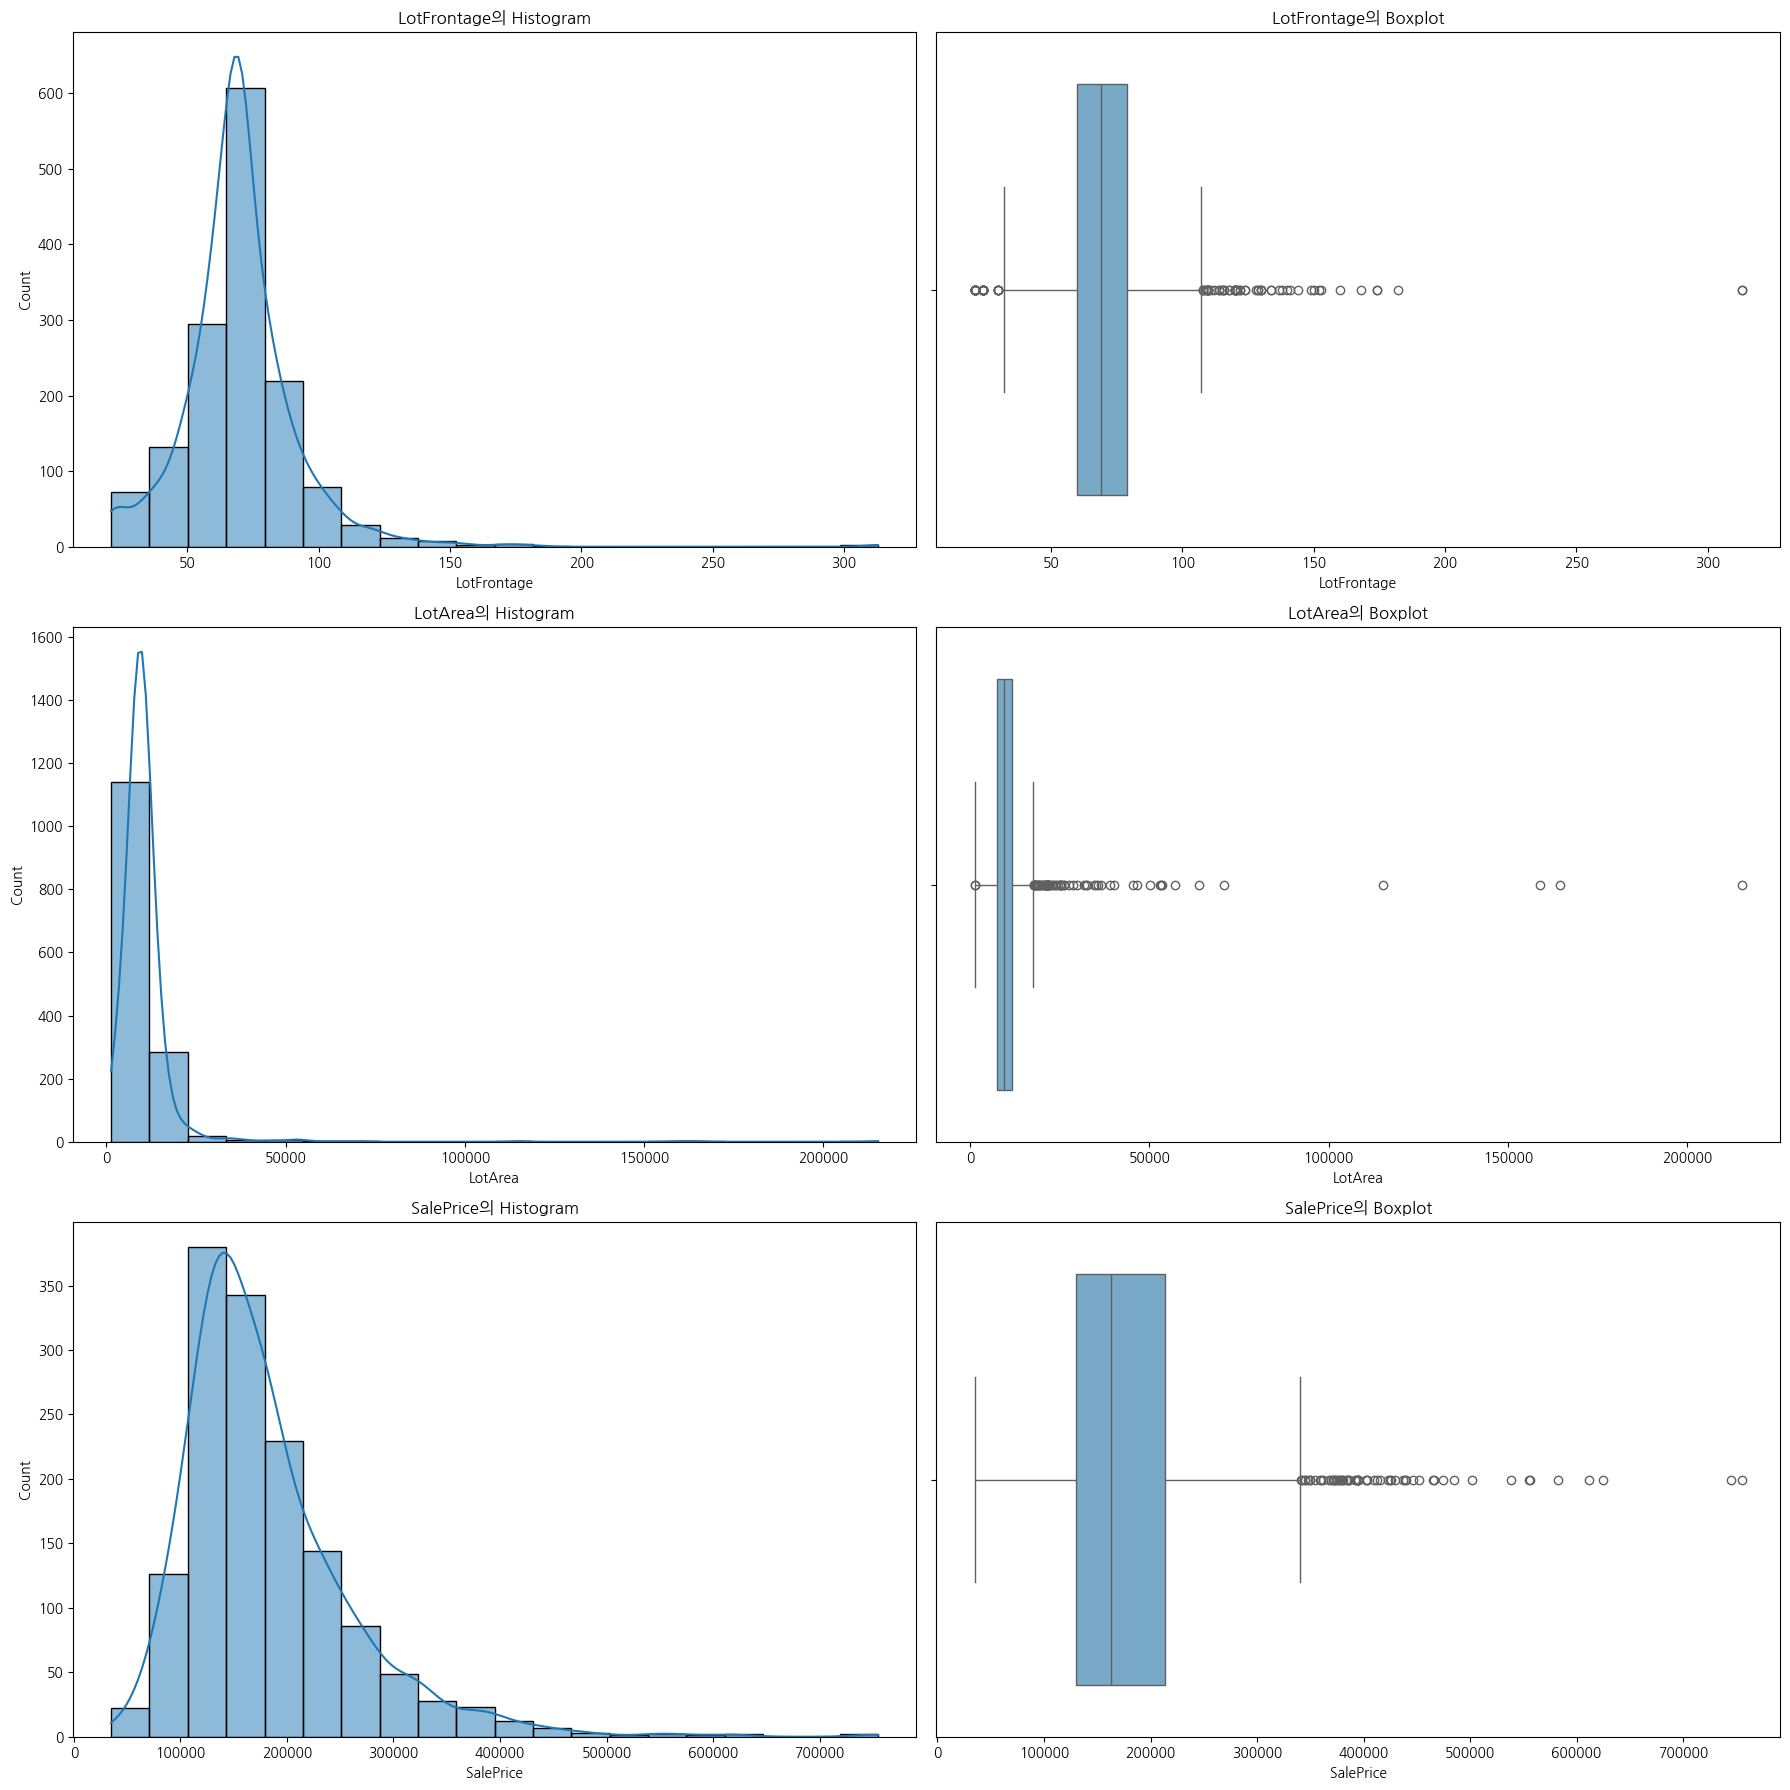

In [26]:
# 연속형 변수 분포 및 이상치 확인
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)  
sns.histplot(train_data_basic, x='LotFrontage', bins=20, kde=True, palette='Blues')
plt.title('LotFrontage의 Histogram')

plt.subplot(3, 2, 2) 
sns.boxplot(data=train_data_basic, x='LotFrontage', palette='Blues')
plt.title('LotFrontage의 Boxplot')

plt.subplot(3, 2, 3) 
sns.histplot(train_data_basic, x='LotArea', bins=20, kde=True, palette='Blues')
plt.title('LotArea의 Histogram')

plt.subplot(3, 2, 4) 
sns.boxplot(data=train_data_basic, x='LotArea', palette='Blues')
plt.title('LotArea의 Boxplot')

plt.subplot(3, 2, 5) 
sns.histplot(train_data_basic, x='SalePrice', bins=20, kde=True, palette='Blues')
plt.title('SalePrice의 Histogram')

plt.subplot(3, 2, 6) 
sns.boxplot(data=train_data_basic, x='SalePrice', palette='Blues')
plt.title('SalePrice의 Boxplot')

# 그래프 출력
plt.tight_layout()
plt.show()

세 피쳐 모두 꼬리가 모두 꼬리가 긴 형태의(왜도가 양수인) 분포가 나타나는 것으로 보아       
이상치의 영향을 크게 받는 MinMax Scaler나 Standard Scaler보다는 이상치의 영향을 줄일 수 있는 Robust Scaler를 활용하는 것이 좋을 것으로 보임

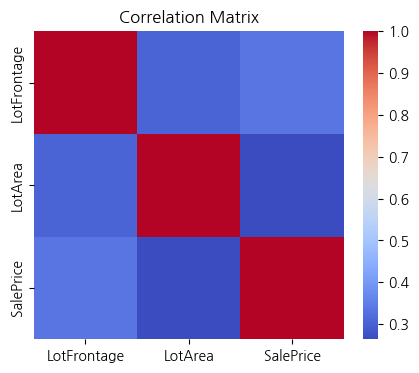


 #################### 상관관계 값 확인 ####################
             LotFrontage   LotArea  SalePrice
LotFrontage     1.000000  0.304522   0.334771
LotArea         0.304522  1.000000   0.263843
SalePrice       0.334771  0.263843   1.000000


In [28]:
# 수치형 변수의 상관관계 분석
corr_matrix = train_data_basic.corr(numeric_only=True)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 상관관계 값 프린트
print('\n', '#'*20, '상관관계 값 확인', '#'*20)
print(corr_matrix)

SalePrice와 다른 두 피쳐 간의 상관계수는 0.2와 0.4 사이로 나타나 보통 수준의 양적 상관관계를 보임

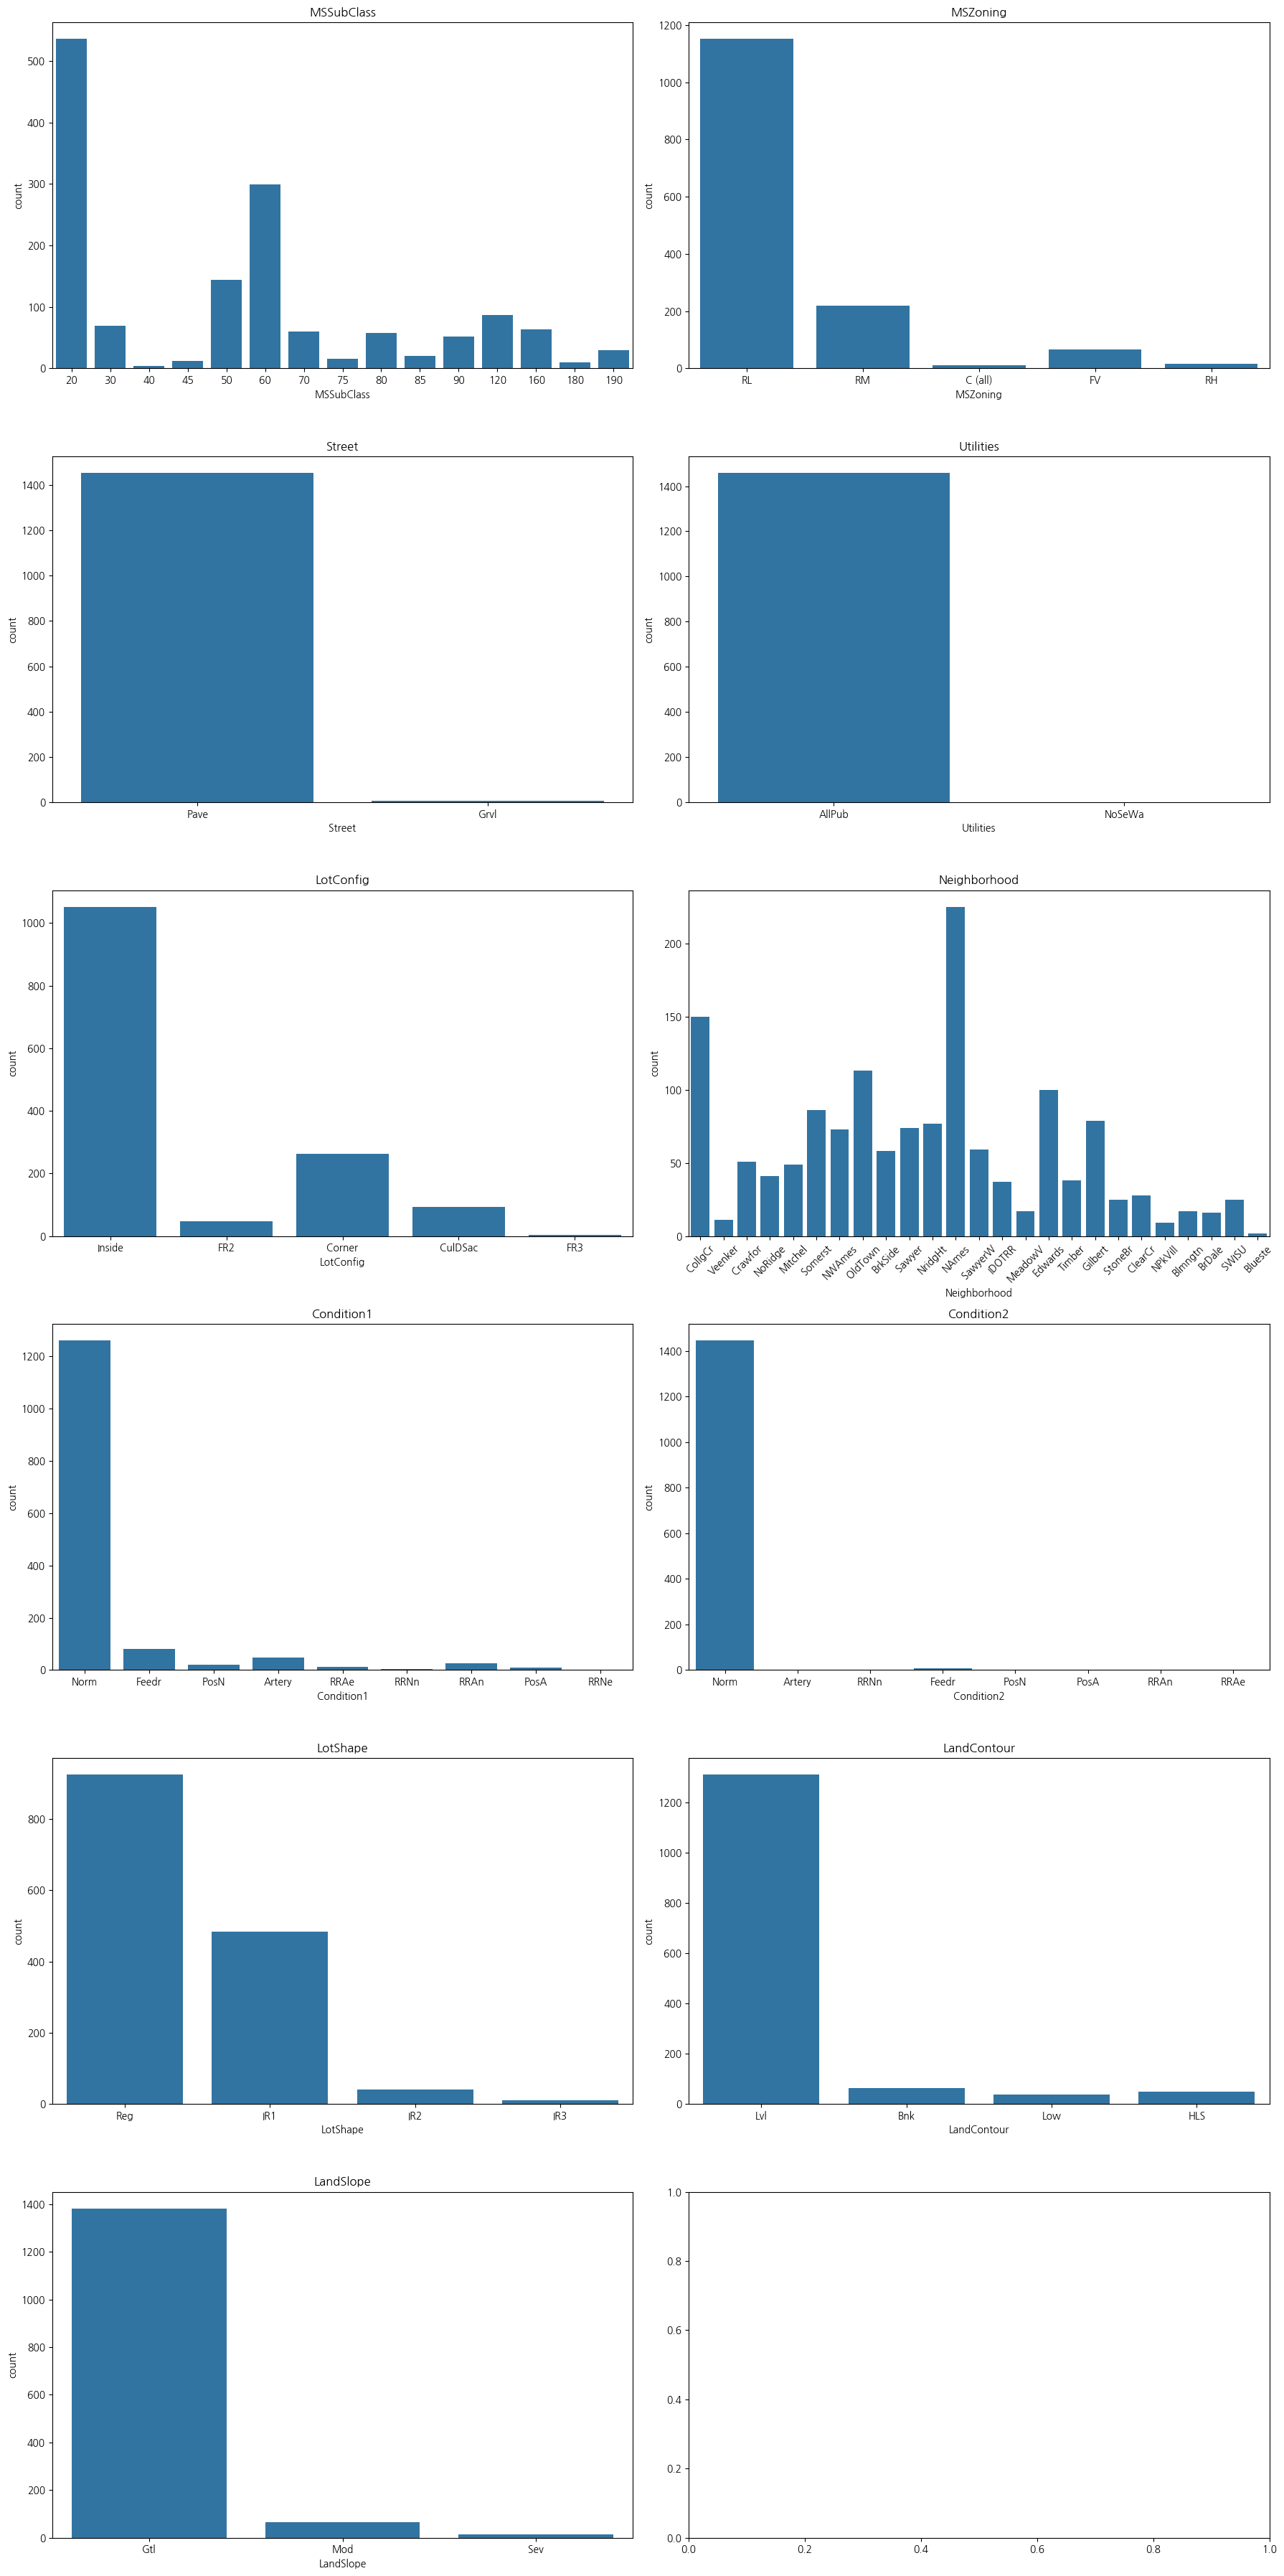

In [30]:
# 범주형 변수 분포 확인

fig, axes = plt.subplots(6, 2, figsize=(18,36))

sns.countplot(data=train_data_basic, x=basic_cols_nom[0], ax=axes[0, 0])
axes[0, 0].set_title(basic_cols_nom[0])
sns.countplot(data=train_data_basic, x=basic_cols_nom[1], ax=axes[0, 1])
axes[0, 1].set_title(basic_cols_nom[1])
sns.countplot(data=train_data_basic, x=basic_cols_nom[2], ax=axes[1, 0])
axes[1, 0].set_title(basic_cols_nom[2])
sns.countplot(data=train_data_basic, x=basic_cols_nom[3], ax=axes[1, 1])
axes[1, 1].set_title(basic_cols_nom[3])
sns.countplot(data=train_data_basic, x=basic_cols_nom[4], ax=axes[2, 0])
axes[2, 0].set_title(basic_cols_nom[4])
sns.countplot(data=train_data_basic, x=basic_cols_nom[5], ax=axes[2, 1])
axes[2, 1].set_title(basic_cols_nom[5])
axes[2, 1].tick_params(axis='x', rotation=45)  # 회전 적용
sns.countplot(data=train_data_basic, x=basic_cols_nom[6], ax=axes[3, 0])
axes[3, 0].set_title(basic_cols_nom[6])
sns.countplot(data=train_data_basic, x=basic_cols_nom[7], ax=axes[3, 1])
axes[3, 1].set_title(basic_cols_nom[7])
sns.countplot(data=train_data_basic, x=basic_cols_ord[0], ax=axes[4, 0])
axes[4, 0].set_title(basic_cols_ord[0])
sns.countplot(data=train_data_basic, x=basic_cols_ord[1], ax=axes[4, 1])
axes[4, 1].set_title(basic_cols_ord[1])
sns.countplot(data=train_data_basic, x=basic_cols_ord[2], ax=axes[5, 0])
axes[5, 0].set_title(basic_cols_ord[2])

plt.tight_layout()
plt.show()

'Street', 'Utilities', 'Condition2'는 value 간의 불균형이 지나치게 커 분석의 의미가 없을 것으로 보여 모델에서 삭제하겠음

In [32]:
# 훈련 데이터셋에서 'Street', 'Utilities', 'Condition2'컬럼 삭제
train_data_basic_cleaned = train_data_basic.drop(columns=['Street', 'Utilities', 'Condition2'])
train_data_basic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   MSSubClass    1460 non-null   object 
 3   MSZoning      1460 non-null   object 
 4   LotShape      1460 non-null   object 
 5   LandContour   1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   LandSlope     1460 non-null   object 
 8   Neighborhood  1460 non-null   object 
 9   Condition1    1460 non-null   object 
 10  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 125.6+ KB


In [33]:
basic_cols_nom_cleaned=['MSSubClass', 
              'MSZoning', 
              'LotConfig', 
              'Neighborhood',
              'Condition1']

범주형 피쳐를 병합하기에 앞서, 별도로 병합하지 않고 모두 원핫인코딩한 후 random forest 방식으로 모델링하여 feature importance를 구해보겠음.

In [35]:
# Robust Scaler로 수치형 피쳐 스케일링
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

train_data_basic_cleaned[basic_cols_num] = scaler.fit_transform(train_data_basic_cleaned[basic_cols_num])
train_data_basic_cleaned.head()

,LotFrontage,LotArea,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,SalePrice
0,-0.210526,-0.254076,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,0.541506
1,0.578947,0.030015,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,0.220173
2,-0.052632,0.437624,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,0.720024
3,-0.473684,0.017663,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,-0.273728
4,0.789474,1.181201,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1.035406


In [36]:
# 원핫 인코딩
train_data_basic_encoded = pd.get_dummies(train_data_basic_cleaned, drop_first=True)
train_data_basic_encoded.head()

,LotFrontage,LotArea,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,-0.210526,-0.254076,0.541506,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,0.578947,0.030015,0.220173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,-0.052632,0.437624,0.720024,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,-0.473684,0.017663,-0.273728,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0.789474,1.181201,1.035406,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


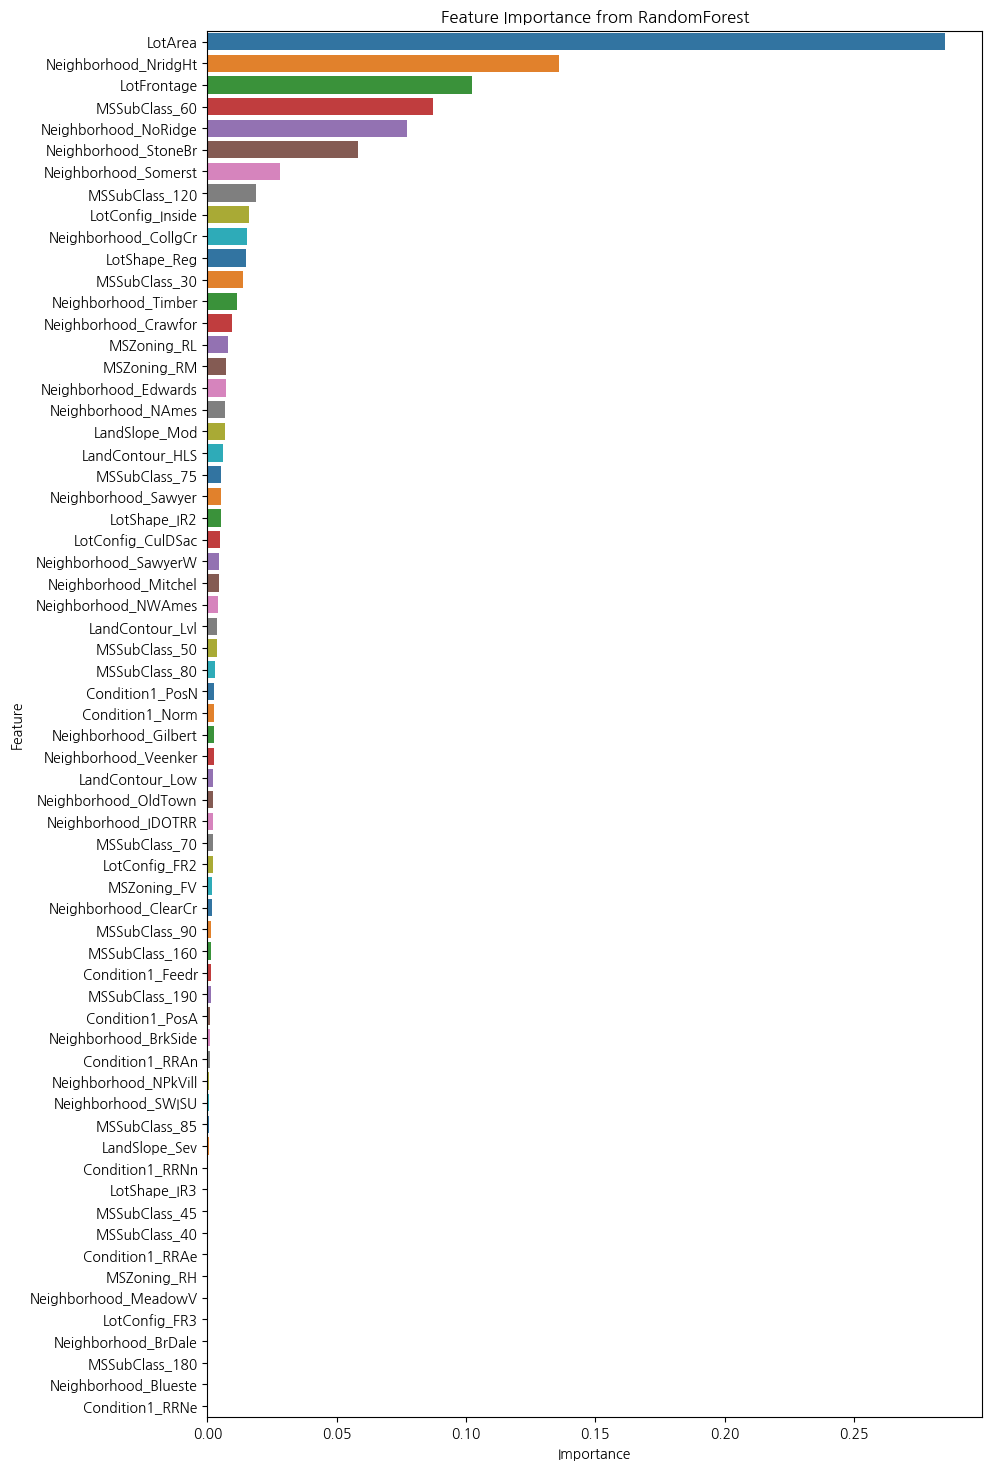

In [37]:
# random forest 모델링 후 Feature Importance 계산
from sklearn.ensemble import RandomForestRegressor

X = train_data_basic_encoded.drop('SalePrice', axis=1)
y = train_data_basic_encoded['SalePrice']

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

importances = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='tab10')
plt.title('Feature Importance from RandomForest')
plt.show()

In [38]:
pd.set_option('display.max_rows', None)
importance_df

,Feature,Importance
1,LotArea,0.285468
47,Neighborhood_NridgHt,0.136104
0,LotFrontage,0.102328
6,MSSubClass_60,0.087175
46,Neighborhood_NoRidge,0.077373
53,Neighborhood_StoneBr,0.058151
52,Neighborhood_Somerst,0.027980
12,MSSubClass_120,0.018886
29,LotConfig_Inside,0.016140
36,Neighborhood_CollgCr,0.015465


더미 변수의 피쳐 중요도가 각각 분할되어있어 원래 해당 피쳐의 중요도를 한번에 확인하기 어려움          
따라서 더미 변수로 분할된 피쳐들을 다시 합쳐서 중요도를 다시 시각화해보겠음

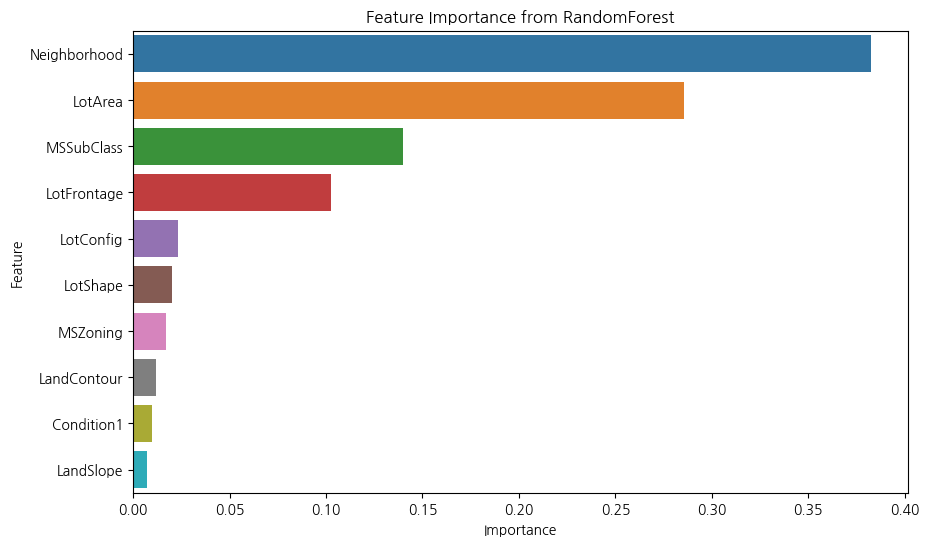


         Feature  Importance
0  Neighborhood    0.382697
1       LotArea    0.285468
2    MSSubClass    0.139725
3   LotFrontage    0.102328
4     LotConfig    0.023325
5      LotShape    0.020355
6      MSZoning    0.017164
7   LandContour    0.012037
8    Condition1    0.009628
9     LandSlope    0.007273


In [40]:
# '_'를 기준으로 Feature 명을 다시 복원하여 새 컬럼에 저장
importance_df['FeatureKey'] = importance_df['Feature'].str.split('_').str[0]

# Feature별 피쳐 중요도 합산
importance_df_agg = importance_df.groupby('FeatureKey').agg({'Importance': 'sum'}).sort_values(by='Importance', ascending=False).reset_index()
importance_df_agg.rename(columns={'FeatureKey': 'Feature'}, inplace=True)

# 결과 출력

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_agg, palette='tab10')
plt.title('Feature Importance from RandomForest')
plt.show()

print('\n', importance_df_agg)

Random Forest 모델을 통해 피쳐 중요도를 확인한 결과          
Neighborhood(인접지역), LotArea(대지 면적), MSSubClass(판매된 주택의 유형), LotFrontage(도로와 연결된 주택의 전면 길이)      
등의 순으로 나타났으며 나머지 피쳐들의 중요도는 상대적으로 떨어지는 것으로 나타남
        
비교를 위해 선형 회귀 모델을 활용하여 회귀 계수를 통해 피쳐 중요도를 비교해보겠음          

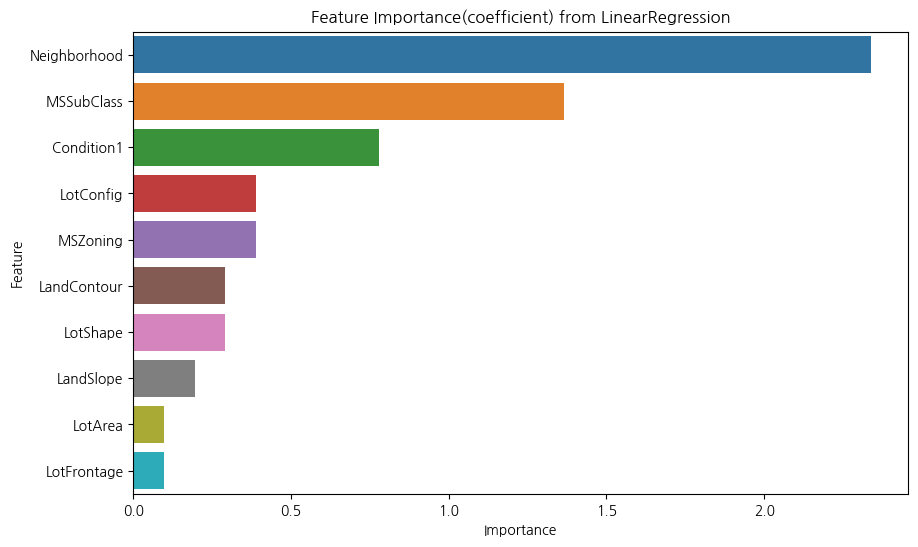


         Feature  Importance
0  Neighborhood    2.339490
1    MSSubClass    1.364702
2    Condition1    0.779830
3     LotConfig    0.389915
4      MSZoning    0.389915
5   LandContour    0.292436
6      LotShape    0.292436
7     LandSlope    0.194957
8       LotArea    0.097479
9   LotFrontage    0.097479


In [51]:
# 선형회귀 모델의 회귀계수를 통한 피쳐 중요도 비교

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
importance_lr = pd.DataFrame(data={'Feature': X.columns, 'Importance': lr.coef_[0]}).sort_values(by='Importance', ascending=False)

importance_lr['FeatureKey'] = importance_lr['Feature'].str.split('_').str[0]

# Feature별 피쳐 중요도 합산
importance_lr_agg = importance_lr.groupby('FeatureKey').agg({'Importance': 'sum'}).sort_values(by='Importance', ascending=False).reset_index()
importance_lr_agg.rename(columns={'FeatureKey': 'Feature'}, inplace=True)

# 결과 출력

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_lr_agg, palette='tab10')
plt.title('Feature Importance(coefficient) from LinearRegression')
plt.show()

print('\n', importance_lr_agg)

랜덤 포레스트 모델과 달리 Neighborhood, MSSubClass, Condition1 등의 순으로 나타났으며,         
LotArea와 LotFrontage의 중요도가 크게 하락하여 Bot2를 기록한 반면 Condition1의 중요도가 크게 상승하였음          
(이 차이는 어디서 오는지, 둘 중 어떤 모델의 중요도를 채택해야할지 고민이 필요)

(이후 피쳐 값을 병합해야 할지....? 속도 면에서는 큰 영향은 없어보이므로 병합한다면 단순 모델링 속도 이외의 실질적 이유가 필요)